# Retail Data

In [2]:
# IMPORT HERE!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# df = pd.read_csv("C:\\Users\\dylan.narvadez\\Desktop\\Work Files\\Projects\\Pod 1 myInsurance\\myinsurance_dataset_final.csv")
df = pd.read_csv("C:\\Users\\dylan.narvadez\\Desktop\\Files\\Personal\\Data Science\\GlobalCert Internship\\retail_data.csv", encoding='latin-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [6]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [23]:
df["InvoiceDate"].agg(["min", "max"])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [26]:
df["CustomerID"].nunique()

4372

**Define new fields**

In [7]:
df["TimeSegment"] =  df["InvoiceDate"].apply(lambda x: "First 6 months" if x <= pd.Timestamp(2011, 6, 6) else "Last 6 months")

In [42]:
df.groupby("TimeSegment").agg(["min", "max"])["InvoiceDate"]

,min,max
TimeSegment,,
First 6 months,2010-12-01 08:26:00,2011-06-05 16:05:00
Last 6 months,2011-06-06 08:04:00,2011-12-09 12:50:00


In [175]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeSegment,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,First 6 months,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,First 6 months,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01


In [83]:
purchase = df.groupby(["CustomerID", "TimeSegment"])["InvoiceNo"].nunique().unstack()
purchase.fillna(0, inplace = True)

In [95]:
purchase["Delta(#)"] = purchase["First 6 months"] - purchase["Last 6 months"]
purchase["Delta(%)"] = (purchase["Delta(#)"]/purchase["First 6 months"])*100
purchase["Trend"] = purchase.apply(lambda row: "Purchase Increased" if row["First 6 months"] < row["Last 6 months"] else "Purchase Decreased", axis = 1)

def change_colour(val):
    return ['background-color: red' if x == "Purchase Decreased"  else 'background-color: green' for x in val]

**Frequency of purchase (unique InvoiceNo) per CustomerID**

In [172]:
# purchase = purchase.sort_values("Delta(#)", ascending = False)
purchase = purchase.sort_values("Delta(%)", ascending = False)

purchase[purchase["First 6 months"] >= 20].style.apply(change_colour, axis = 1, subset = "Trend")

TimeSegment,First 6 months,Last 6 months,Delta(#),Delta(%),Trend
CustomerID,,,,,
17850.000000,35.000000,0.000000,35.000000,100.000000,Purchase Decreased
13113.000000,28.000000,12.000000,16.000000,57.142857,Purchase Decreased
13854.000000,20.000000,9.000000,11.000000,55.000000,Purchase Decreased
14180.000000,21.000000,10.000000,11.000000,52.380952,Purchase Decreased
14298.000000,30.000000,15.000000,15.000000,50.000000,Purchase Decreased
13534.000000,27.000000,16.000000,11.000000,40.740741,Purchase Decreased
15061.000000,34.000000,21.000000,13.000000,38.235294,Purchase Decreased
13777.000000,25.000000,16.000000,9.000000,36.000000,Purchase Decreased
13798.000000,37.000000,26.000000,11.000000,29.729730,Purchase Decreased


In [137]:
# df["InvoiceMonth"] = df["InvoiceDate"] + pd.offsets.MonthBegin(-1)
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period('M').dt.to_timestamp()

In [139]:
country = df.groupby(["Country", "InvoiceMonth"])["InvoiceNo"].count().reset_index()

In [138]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeSegment,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,First 6 months,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,First 6 months,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01


In [128]:
i = -1

<AxesSubplot:xlabel='InvoiceMonth', ylabel='InvoiceNo'>

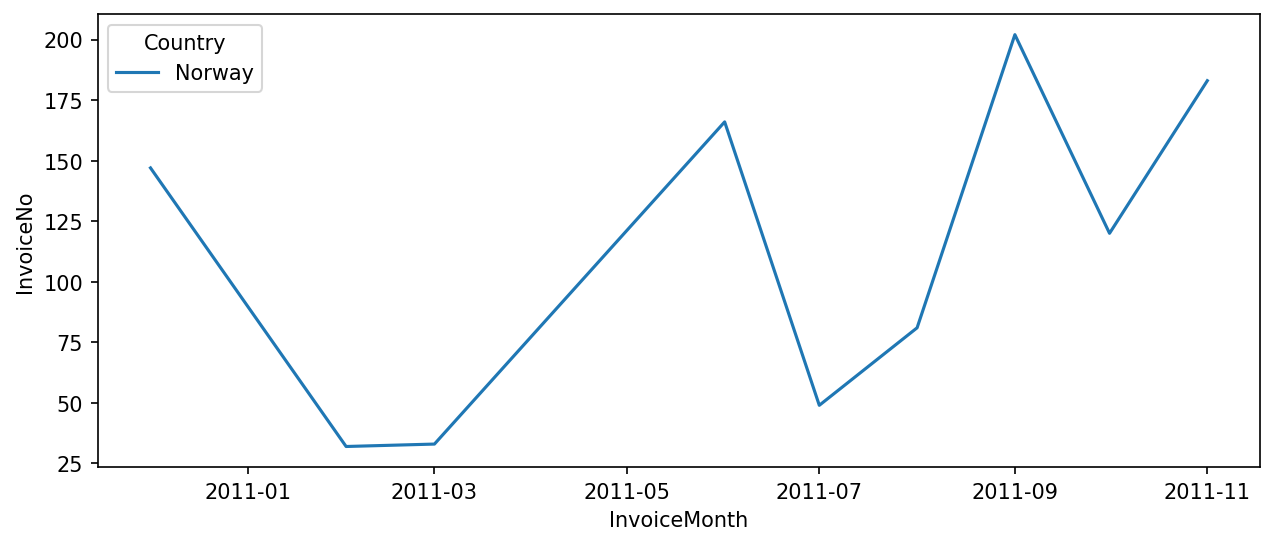

In [174]:
plt.figure(figsize=(10,4),dpi=150)

dist_country = country.Country.unique()
i = i + 1
temp = country[(country["Country"] == dist_country[i])&(country["InvoiceMonth"] != pd.Timestamp(2011, 12, 1))]

sns.lineplot(data = temp, x = "InvoiceMonth", y = "InvoiceNo", hue = "Country")

In [127]:
country.Country.unique()[1]

'Austria'

<AxesSubplot:xlabel='InvoiceMonth', ylabel='InvoiceNo'>

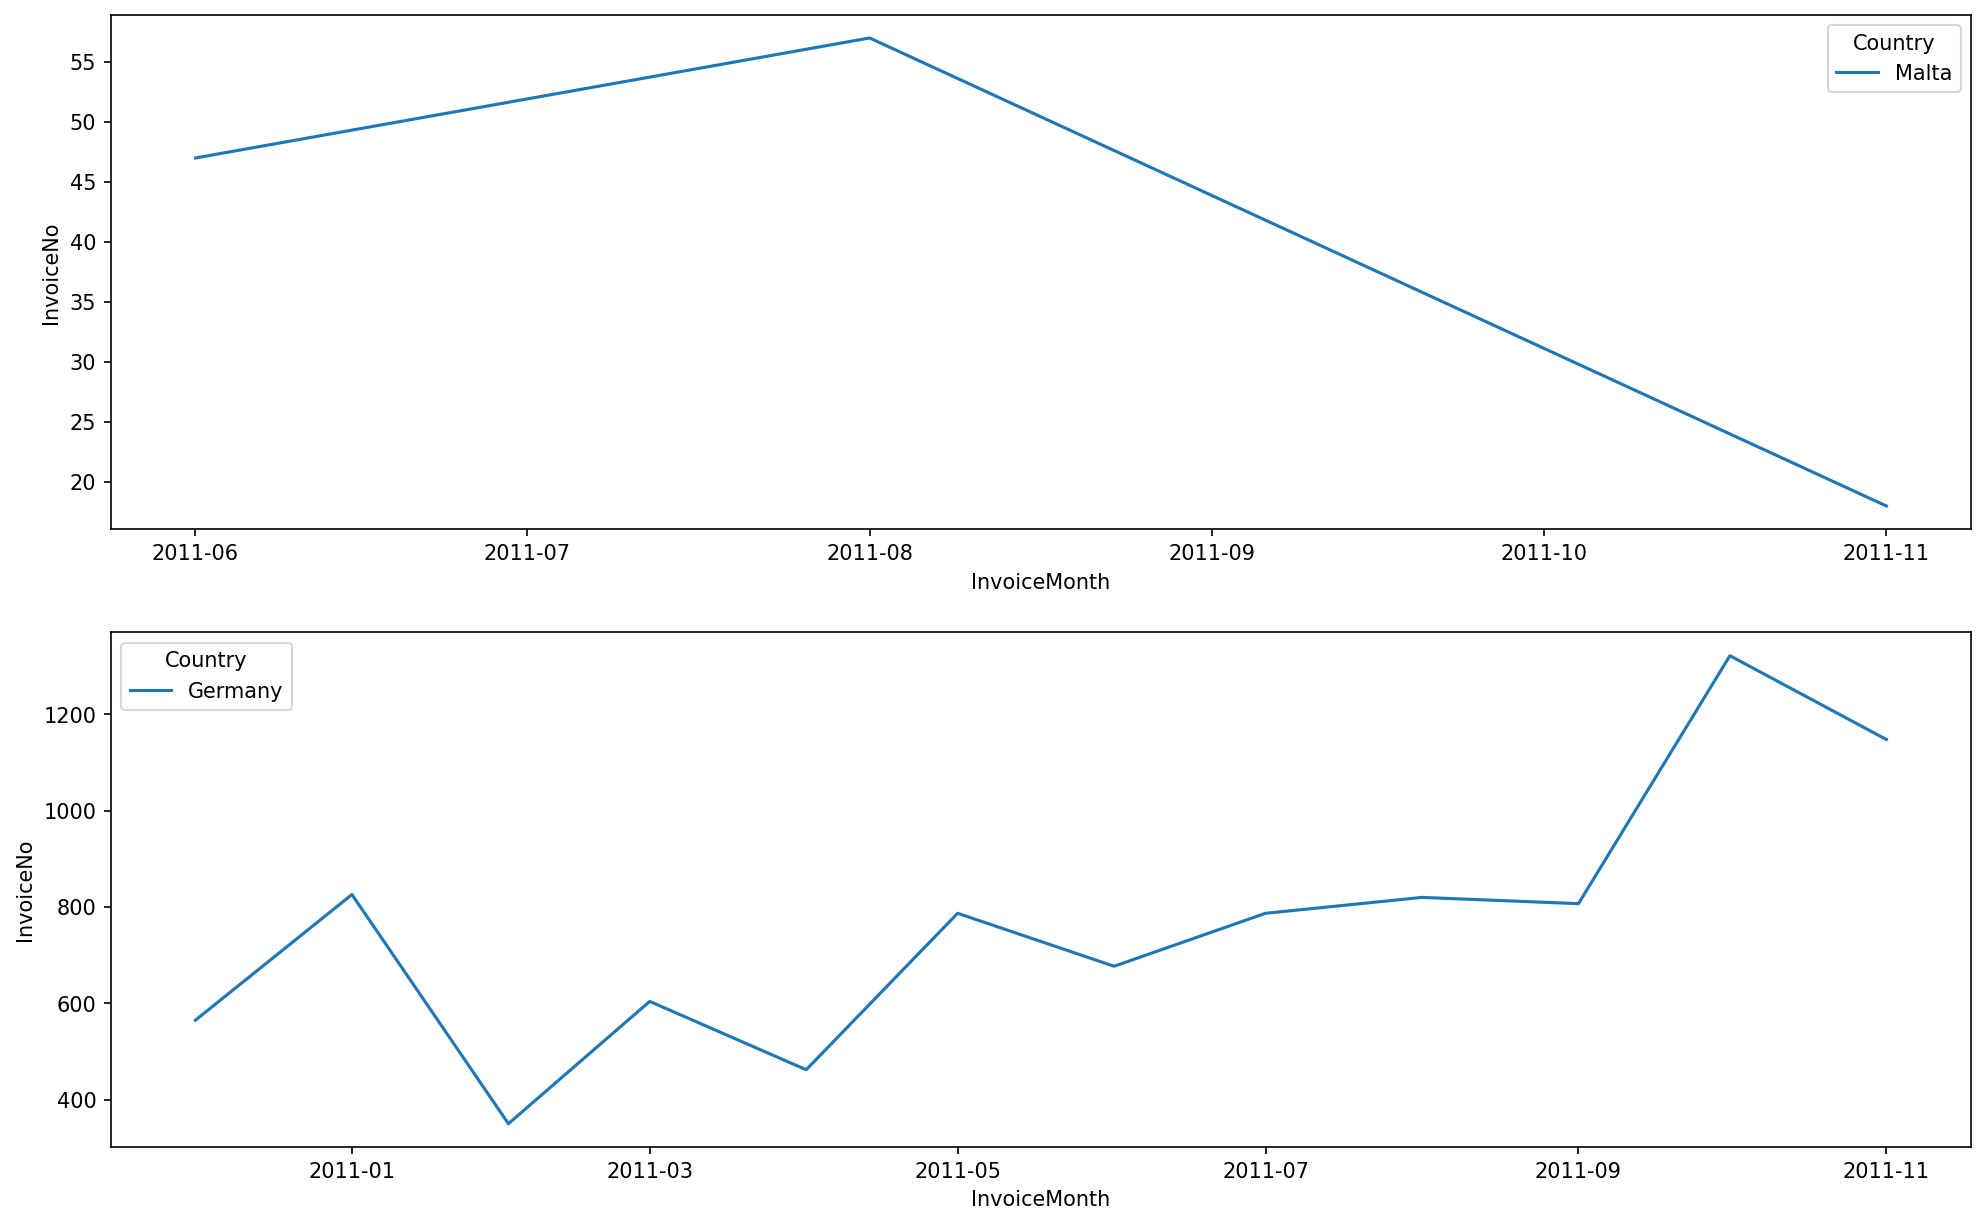

In [171]:
fig, ax = plt.subplots(2, figsize=(16,10),dpi=150)

temp1 = country[(country["Country"] == "Malta")&(country["InvoiceMonth"] != pd.Timestamp(2011, 12, 1))]
temp2 = country[(country["Country"] == "Germany")&(country["InvoiceMonth"] != pd.Timestamp(2011, 12, 1))]

sns.lineplot(ax = ax[0], data = temp1, x = "InvoiceMonth", y = "InvoiceNo", hue = "Country")

sns.lineplot(ax = ax[1], data = temp2, x = "InvoiceMonth", y = "InvoiceNo", hue = "Country")

In [182]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [183]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeSegment,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,First 6 months,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,First 6 months,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,First 6 months,2010-12-01


**Checking which commodity sales dipped**

In [208]:
commodity = df.groupby(["Description", "TimeSegment"])["Quantity"].sum().unstack()
commodity.fillna(0, inplace = True)

In [210]:
commodity["Delta(#)"] = commodity["First 6 months"] - commodity["Last 6 months"]
commodity["Delta(%)"] = (commodity["Delta(#)"]/commodity["First 6 months"])*100
commodity["Trend"] = commodity.apply(lambda row: "Purchase Increased" if row["First 6 months"] < row["Last 6 months"] else "Purchase Decreased", axis = 1)

def change_colour(val):
    return ['background-color: red' if x == "Purchase Decreased"  else 'background-color: green' for x in val]

In [217]:
# commodity = purchase.sort_values("Delta(#)", ascending = False)
commodity = commodity.sort_values("Delta(%)", ascending = False)

commodity[commodity["First 6 months"] >= 1000].style.apply(change_colour, axis = 1, subset = "Trend")

TimeSegment,First 6 months,Last 6 months,Delta(#),Delta(%),Trend
Description,,,,,
ANTIQUE SILVER TEA GLASS ETCHED,4558.000000,0.000000,4558.000000,100.000000,Purchase Decreased
JUMBO BAG SCANDINAVIAN PAISLEY,2059.000000,0.000000,2059.000000,100.000000,Purchase Decreased
LARGE POPCORN HOLDER,1025.000000,0.000000,1025.000000,100.000000,Purchase Decreased
LARGE PINK GLASS SUNDAE DISH,1013.000000,0.000000,1013.000000,100.000000,Purchase Decreased
did a credit and did not tick ret,1300.000000,0.000000,1300.000000,100.000000,Purchase Decreased
incorrectly credited C550456 see 47,1300.000000,0.000000,1300.000000,100.000000,Purchase Decreased
PINK 3 PIECE POLKADOT CUTLERY SET,1471.000000,0.000000,1471.000000,100.000000,Purchase Decreased
S/4 VALENTINE DECOUPAGE HEART BOX,1484.000000,0.000000,1484.000000,100.000000,Purchase Decreased
TEA TIME TEA TOWELS,2600.000000,0.000000,2600.000000,100.000000,Purchase Decreased


In [215]:
commodity["First 6 months"].mean()

531.794456708364

**Conclusion**

1. Insight: There are customers w/ frequent purchase on first half of the year but with little to NO purchase on the latter half.

- Action: create investigation or conduct survey on these specific clients to understand the decline in their purchasing

2. Insight: There are countries with increasing sales over time while some countries are on declining trend.
- Action: to adopt best practices in strategies of those growing countries

3. Some commodities are losing in popularity, i.e. sales volume are declining over time.
- Action: may perform marketing campaigns or promos on those declining commodities

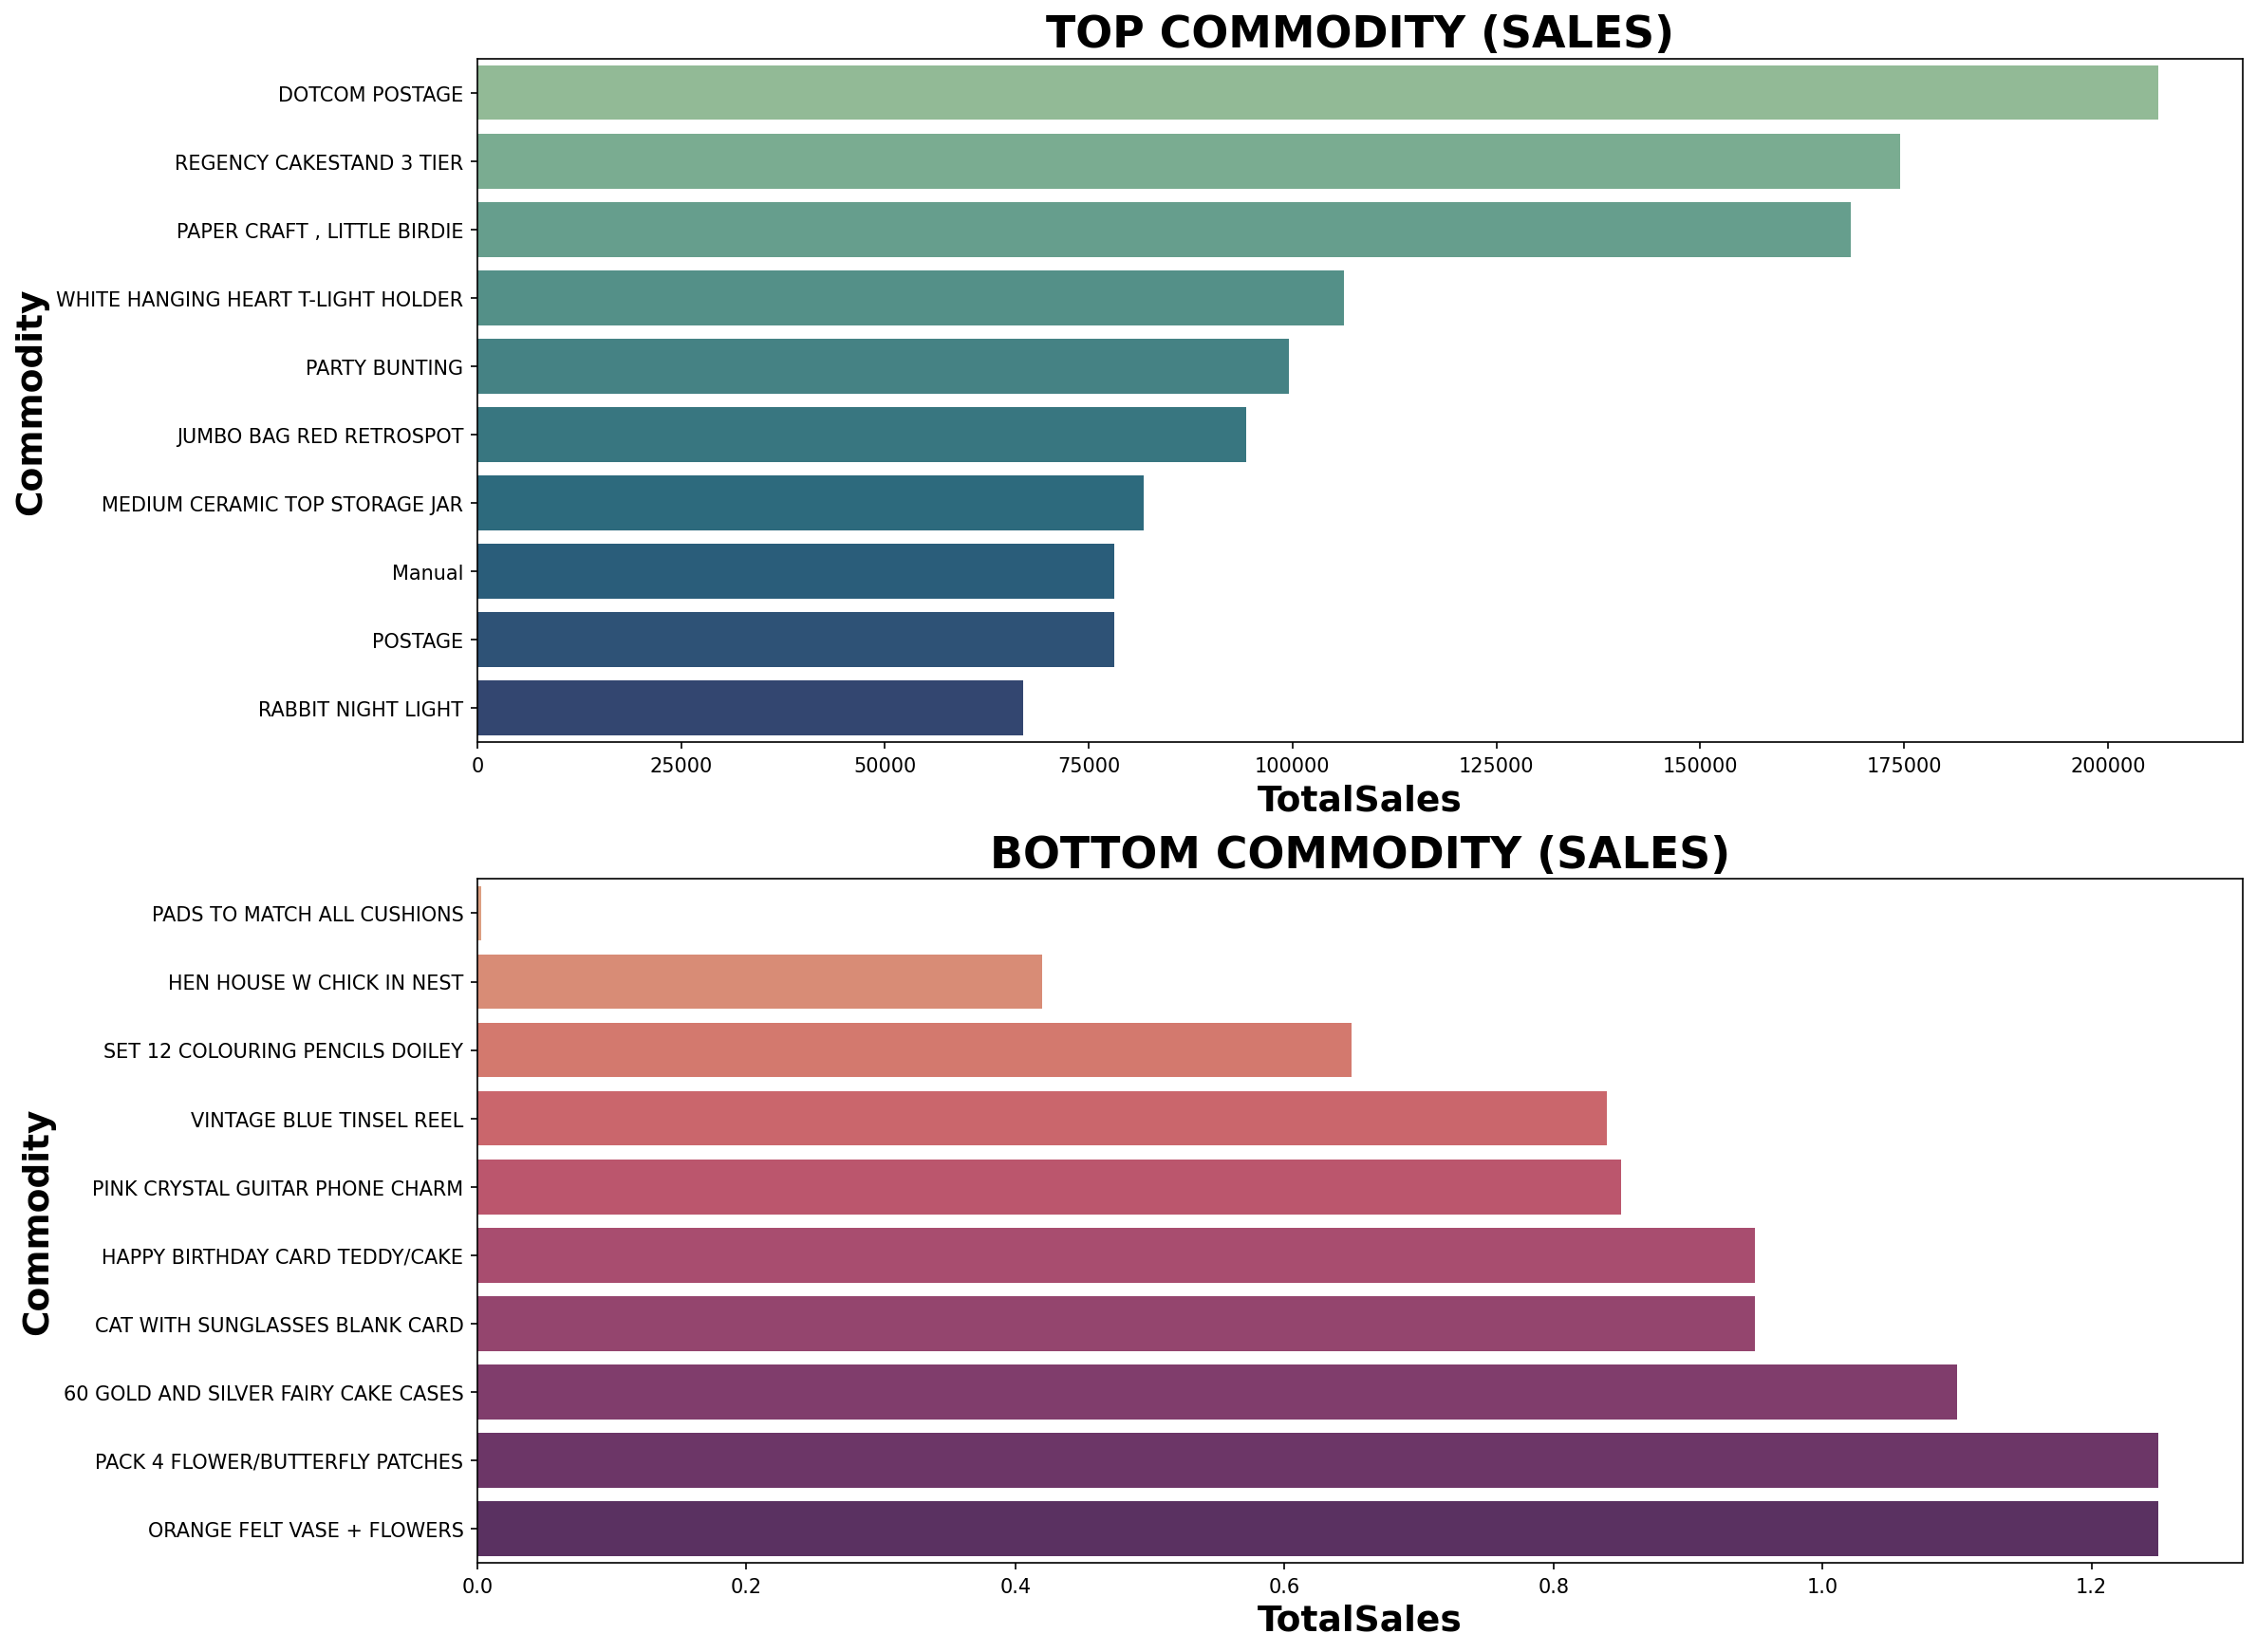

In [283]:
df["TotalSales"] = df["Quantity"]*df["UnitPrice"]

top_sales = df.groupby("Description").sum()[["Quantity", "UnitPrice", "TotalSales"]].reset_index().sort_values(by = "TotalSales", ascending = False).head(10)
bottom_sales = df.groupby("Description").sum()[["Quantity", "UnitPrice", "TotalSales"]].reset_index().sort_values(by = "TotalSales", ascending = True).head(10)

fig, ax = plt.subplots(2, figsize=(16,14),dpi=150)

bar1 = sns.barplot(ax = ax[0], data = top_sales, x = "TotalSales", y = "Description", palette = "crest")
bar2 = sns.barplot(ax = ax[1], data = bottom_sales, x = "TotalSales", y = "Description", palette = "flare")

bar1.set_title('TOP COMMODITY (SALES)', fontdict = { 'fontsize': 22, 'fontweight':'bold'})
bar1.set_xlabel('TotalSales', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )
bar1.set_ylabel('Commodity', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )

bar2.set_title('BOTTOM COMMODITY (SALES)', fontdict= { 'fontsize': 22, 'fontweight':'bold'})
bar2.set_xlabel('TotalSales', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )
bar2.set_ylabel('Commodity', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )

plt.show()

In [237]:
bottom_sales

,Quantity,UnitPrice,TotalSales
Description,,,
PADS TO MATCH ALL CUSHIONS,3,0.003,0.003
HEN HOUSE W CHICK IN NEST,1,0.420,0.420
SET 12 COLOURING PENCILS DOILEY,1,0.650,0.650
VINTAGE BLUE TINSEL REEL,2,0.420,0.840
PINK CRYSTAL GUITAR PHONE CHARM,1,0.850,0.850
HAPPY BIRTHDAY CARD TEDDY/CAKE,5,0.190,0.950
CAT WITH SUNGLASSES BLANK CARD,5,0.190,0.950
60 GOLD AND SILVER FAIRY CAKE CASES,2,1.100,1.100
PACK 4 FLOWER/BUTTERFLY PATCHES,1,1.250,1.250


**KMeans clustering on UnitPrice and Quantity**

<AxesSubplot:ylabel='Quantity'>

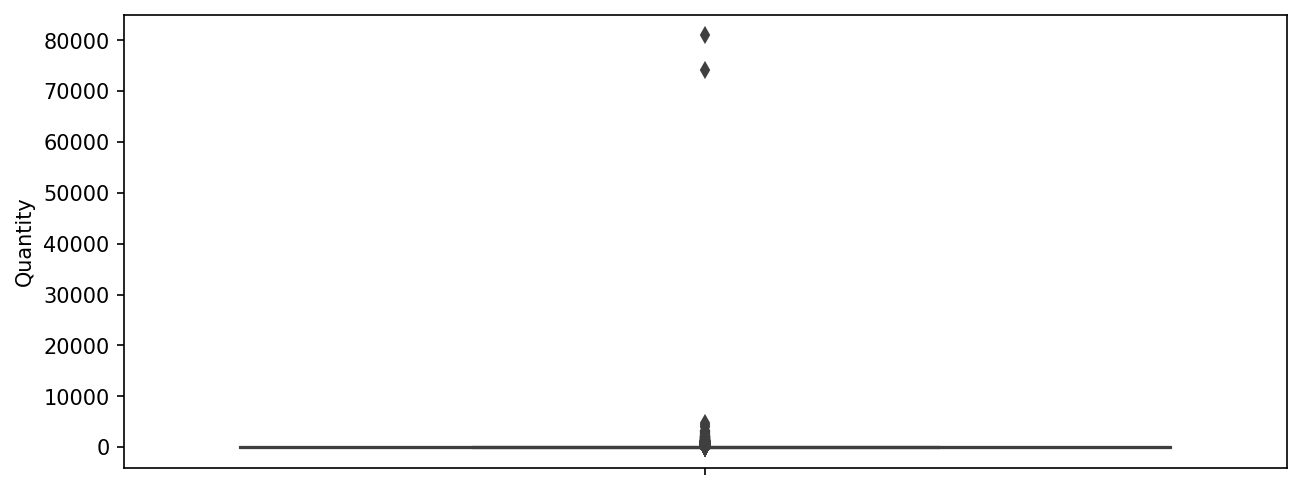

In [22]:
plt.figure(figsize=(10,4),dpi=150)

# temp = df[df["Quantity"] <= 5000]

sns.boxplot(data = df, y = "Quantity")

<AxesSubplot:ylabel='UnitPrice'>

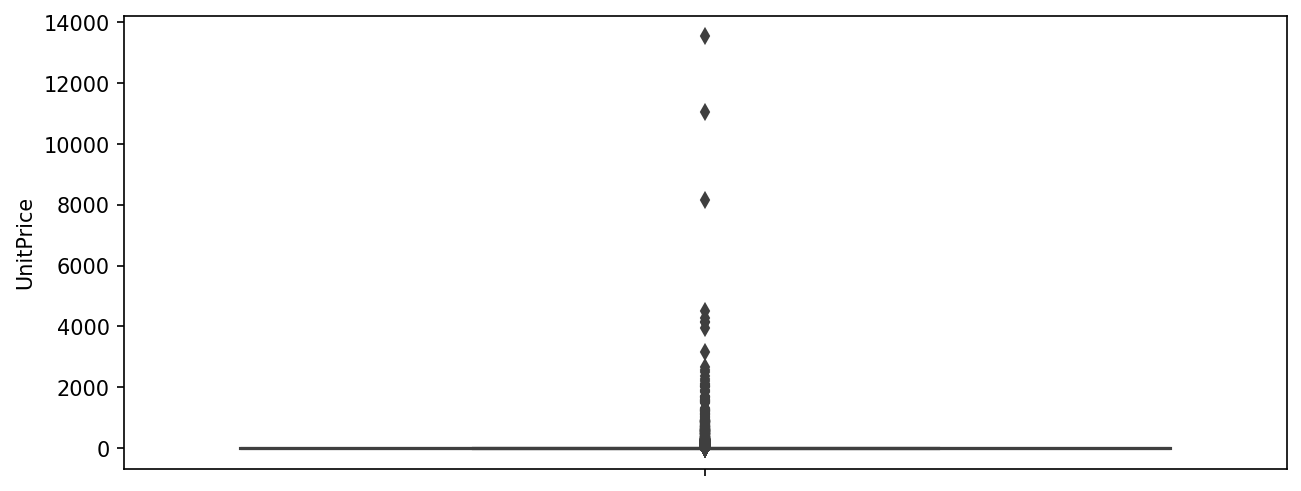

In [23]:
plt.figure(figsize=(10,4),dpi=150)

# temp = df[df["Quantity"] <= 5000]

sns.boxplot(data = df, y = "UnitPrice")

In [27]:
#: Remove outliers
df = df[(df["Quantity"] <= 5000) & (df["UnitPrice"] <= 6000)]

df = df[~df["CustomerID"].isna()]

In [12]:
df.groupby("CustomerID").mean()

,Quantity,UnitPrice
CustomerID,,
12346.0,74215.000000,1.040000
12347.0,13.505495,2.644011
12348.0,75.516129,5.764839
12349.0,8.643836,8.289041
12350.0,11.588235,3.841176
...,...,...
18280.0,4.500000,4.765000
18281.0,7.714286,5.622857
18282.0,8.583333,5.199167


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [82]:
X = df[["Quantity", "UnitPrice"]]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [83]:
X.describe()

,Quantity,UnitPrice
count,397881.000000,397881.000000
mean,12.598242,3.096038
std,42.886053,17.938862
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,4800.000000,4161.060000


In [85]:
ssd = []

for k in range(2,20):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

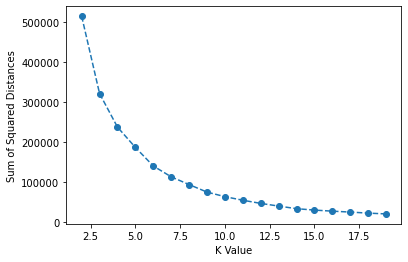

In [86]:
plt.plot(range(2,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

In [108]:
model_final = KMeans(n_clusters=3)
model_final.fit(scaled_X)

KMeans(n_clusters=3)

In [109]:
temp = df.loc[X.index]

temp["Clusters"] = model_final.labels_

temp["TotalSales"] = temp["Quantity"]*temp["UnitPrice"]

In [110]:
temp.groupby("Clusters").mean()[["Quantity", "UnitPrice", "TotalSales"]].reset_index().sort_values(by = "TotalSales", ascending = False)

,Clusters,Quantity,UnitPrice,TotalSales
2,2,1.000000,2126.353500,2126.353500
1,1,680.883166,1.215151,768.714849
0,0,11.259109,2.992861,20.155863


In [113]:
temp.groupby("Clusters").nunique()[["InvoiceNo", "CustomerID"]]

,InvoiceNo,CustomerID
Clusters,,
0,18363,4322
1,446,128
2,18,10


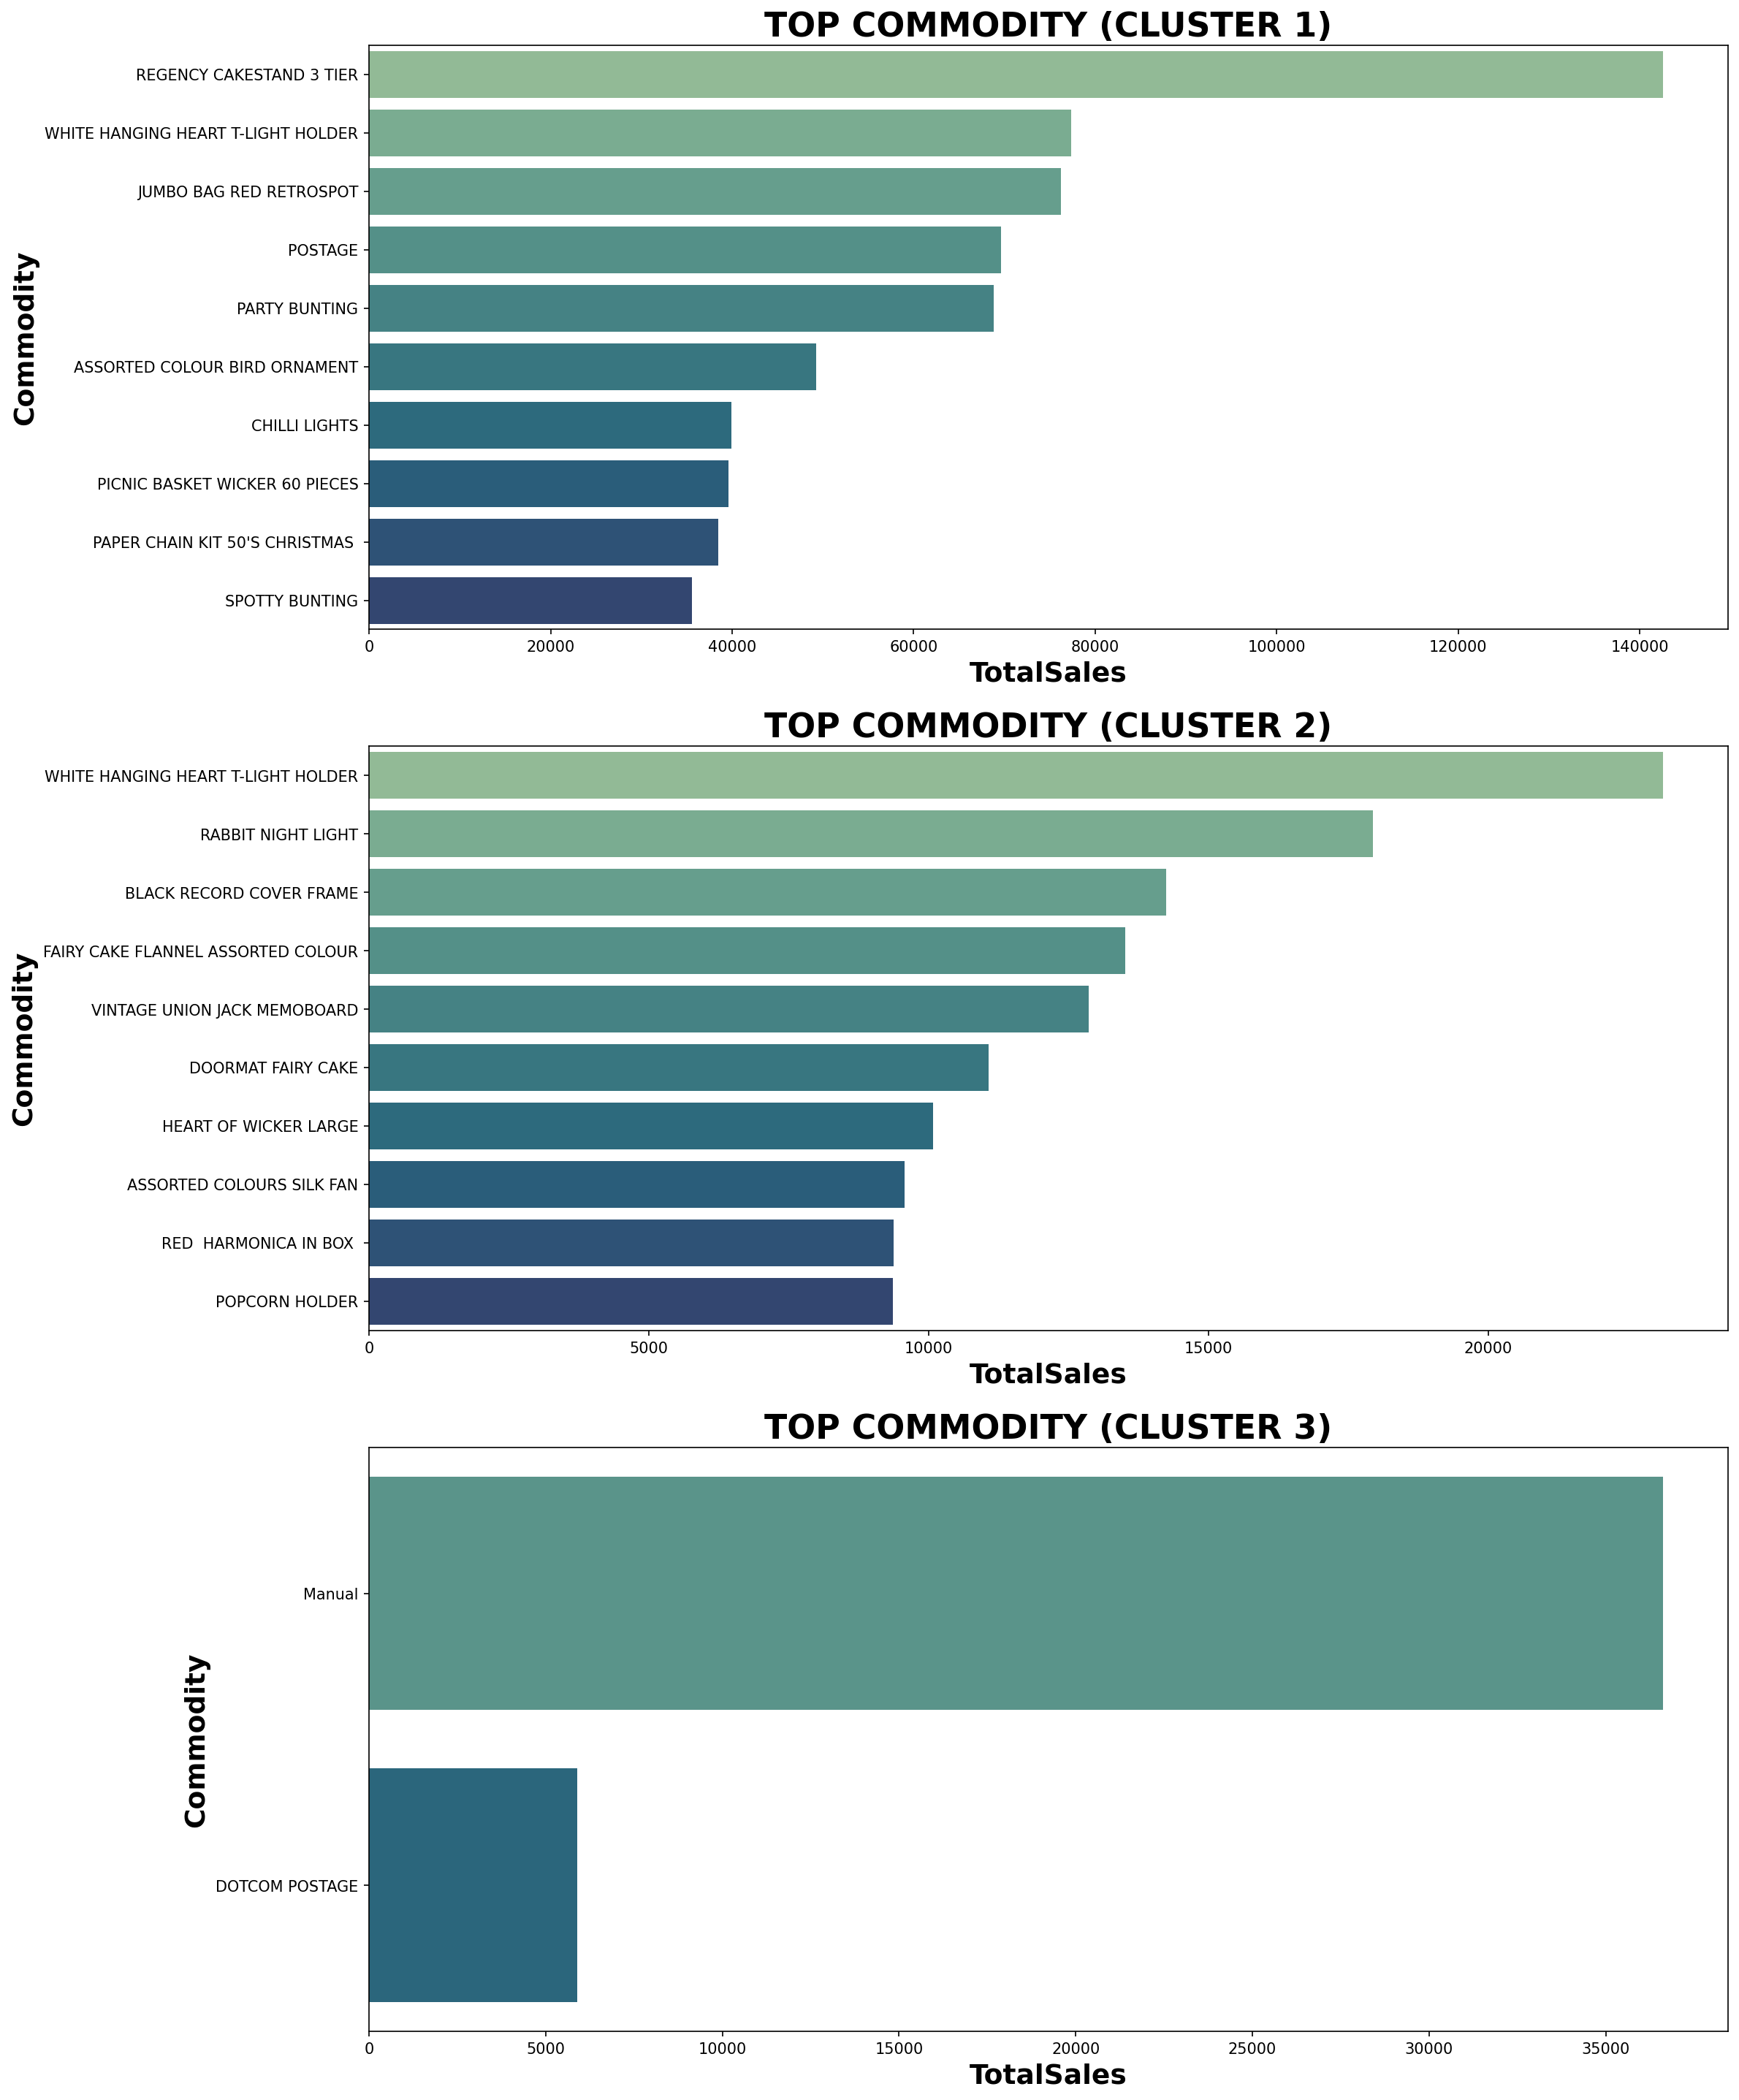

In [131]:
fig, ax = plt.subplots(3, figsize=(16,24),dpi=150)

top_sales_1 = temp[temp["Clusters"] == 0].groupby("Description").sum()[["Quantity", "UnitPrice", "TotalSales"]].reset_index().sort_values(by = "TotalSales", ascending = False).head(10)
top_sales_2 = temp[temp["Clusters"] == 1].groupby("Description").sum()[["Quantity", "UnitPrice", "TotalSales"]].reset_index().sort_values(by = "TotalSales", ascending = False).head(10)
top_sales_3 = temp[temp["Clusters"] == 2].groupby("Description").sum()[["Quantity", "UnitPrice", "TotalSales"]].reset_index().sort_values(by = "TotalSales", ascending = False).head(10)

bar1 = sns.barplot(ax = ax[0], data = top_sales_1, x = "TotalSales", y = "Description", palette = "crest")

bar1.set_title('TOP COMMODITY (CLUSTER 1)', fontdict = { 'fontsize': 22, 'fontweight':'bold'})
bar1.set_xlabel('TotalSales', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )
bar1.set_ylabel('Commodity', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )

bar2 = sns.barplot(ax = ax[1], data = top_sales_2, x = "TotalSales", y = "Description", palette = "crest")

bar2.set_title('TOP COMMODITY (CLUSTER 2)', fontdict = { 'fontsize': 22, 'fontweight':'bold'})
bar2.set_xlabel('TotalSales', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )
bar2.set_ylabel('Commodity', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )

bar3 = sns.barplot(ax = ax[2], data = top_sales_3, x = "TotalSales", y = "Description", palette = "crest")

bar3.set_title('TOP COMMODITY (CLUSTER 3)', fontdict = { 'fontsize': 22, 'fontweight':'bold'})
bar3.set_xlabel('TotalSales', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )
bar3.set_ylabel('Commodity', fontdict = { 'fontsize': 18, 'fontweight':'bold'} )


plt.show()